<a href="https://colab.research.google.com/github/bala-codes/Sentiment_Analysis_on_Amazon_Product_Reviews_Using_Machine_and_Deep_Learning/blob/master/codes%20(DL%20-%20RNN%20%26%20LSTM)/Part-2%20Sentiment%20Analysis%20-%20Training%20-%20Long%20Short%20Term%20Memory%20(LSTM)%20With%20Keras%20Embedding%20Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import string
import pickle
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [ ]:
import pandas as pd

dftrain = pd.read_csv("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/dftrainforlstm.csv", usecols = ['review_body',	'star_rating', 'star_rating_enc', 'review_body_cleaned'],index_col = False)  # SAVE THE FINAL CLEANED COPY IF YOU WANT 
dftest = pd.read_csv("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/dftestforlstm.csv" , usecols = ['review_body',	'star_rating', 'star_rating_enc', 'review_body_cleaned'],index_col = False)  # SAVE THE FINAL CLEANED COPY IF YOU WANT 

dftrain = pd.DataFrame(dftrain)
dftest = pd.DataFrame(dftest)

dftrain.head()

,review_body,star_rating,star_rating_enc,review_body_cleaned
0,GOOD VALUE,4.0,1.0,GOOD VALUE
1,Excellent quality.,5.0,1.0,Excellent quality
2,3rd season using it. I only fill with water an...,4.0,1.0,season using it only fill with water and imme...
3,Nice bag. Should have another strap on bottom ...,4.0,1.0,Nice bag Should another strap bottom somethin...
4,Gave this to my son who used it while we were ...,5.0,1.0,Gave my son used we backpacking loves it


In [ ]:
final_df = pd.concat([dftrain,dftest], axis=0)
print(final_df.shape)
final_df.dropna(inplace=True)
print(final_df.shape)
final_df[['review_body_cleaned', 'star_rating_enc']].to_csv("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/finaldf_forlstm.csv")

(398272, 4)
(398244, 4)


In [ ]:
final_df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Amazon EWS - Final Dataset/finaldf_forlstm.csv', usecols=['review_body_cleaned','star_rating_enc']) 
final_df = pd.DataFrame(final_df)
final_df.head()

,review_body_cleaned,star_rating_enc
0,GOOD VALUE,1.0
1,Excellent quality,1.0
2,season using it only fill with water and imme...,1.0
3,Nice bag Should another strap bottom somethin...,1.0
4,Gave my son used we backpacking loves it,1.0


In [ ]:
final_df['review_body_cleaned'] = final_df['review_body_cleaned'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

sentences = final_df['review_body_cleaned'].values
y = final_df['star_rating_enc'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=123, shuffle=True)
print(sentences_train.shape, sentences_test.shape)
print(y_train.shape, y_test.shape)

(318595,) (79649,)
(318595,) (79649,)


In [ ]:
ytest1 = list(y_test)
print("1's",ytest1.count(1))
print("0's",ytest1.count(0))
print("Thus Test dataset is well Balanced")

1's 39697
0's 39952
Thus Test dataset is well Balanced


In [ ]:
from keras.preprocessing.text import Tokenizer

embed_size = 300 
max_features = 50000 
threshold = 0.35

tokenizer = Tokenizer(num_words = max_features) # 20K -> 50K
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1
print("Total Vocabulary Size", vocab_size)

Using TensorFlow backend.


Total Vocabulary Size 70763


In [1]:
#tokenizer.word_index.items()

In [ ]:
with open('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Keras Embeddings/LSTM_Keras_Emb.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:


def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    print("X",x)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import *

embedding_dim = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen,trainable=True))
model.add(LSTM(units = 196, dropout=0.4, recurrent_dropout=0.4, return_sequences=True))
model.add(LSTM(units = 96, dropout=0.4, recurrent_dropout=0.4, return_sequences=False))
#model.add(GlobalMaxPooling1D())
#model.add(Dense(512,activation="relu"))
#model.add(Dropout(0.4))
#model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 128)          9057664   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 196)          254800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 96)                112512    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 97        
Total params: 9,425,073
Trainable params: 9,425,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
mc = ModelCheckpoint('/content/salstmnormal.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train, y_train, epochs=5 , verbose=1,validation_data=(X_test, y_test),callbacks=[mc])

Train on 318595 samples, validate on 79649 samples
Epoch 1/5
249376/318595 [======================>.......] - ETA: 37:27 - loss: 0.6934 - acc: 0.5009

In [ ]:
%%time
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

In [ ]:
'''model.save('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Pretrained Models/Deep Learning Models//content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Keras Embeddings/sentiment_LSTM_model.h5')
print("Model Saved Successfully")'''

'model.save(\'/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/Pretrained Models/Deep Learning Models//content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Keras Embeddings/sentiment_LSTM_model.h5.h5\')\nprint("Model Saved Successfully")'

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import *
from keras import regularizers
from keras.regularizers import l1_l2

embedding_dim = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen,trainable=True))
model.add((Conv1D(filters=32, kernel_size=3, # 3
                                  activation='relu',
                                  bias_initializer='random_normal',    # random_uniform - > glorot_normal to all
                                  padding='same')))

model.add((Conv1D(filters=32, kernel_size=3, # 3
                                  activation='relu',
                                  bias_initializer='random_normal',
                                  padding='same')))

model.add((MaxPooling1D(pool_size=2)))

model.add((Conv1D(filters=64, kernel_size=4, # 3
                                  activation='relu',
                                  bias_initializer='random_normal',
                                  padding='same')))
model.add(Dropout(rate=0.5)) 

model.add((Conv1D(filters=64, kernel_size=4, # 3
                                  activation='relu',
                                  bias_initializer='random_normal',
                                  padding='same')))
model.add(Dropout(rate=0.5)) 

model.add((MaxPooling1D(pool_size=2)))
model.add((Conv1D(filters=96, kernel_size=4, # 3
                                  activation='relu',
                                  bias_initializer='random_normal',
                                  padding='same')))
model.add(Dropout(rate=0.5)) 

model.add((Conv1D(filters=96, kernel_size=4, # 3
                                  activation='relu',
                                  bias_initializer='random_normal',                                  
                                  padding='same')))
model.add(Dropout(rate=0.5)) 

model.add((MaxPooling1D(pool_size=2)))

model.add((Dropout(rate=0.5)))
model.add(LSTM(units = 196, return_sequences=True, dropout=0.4, recurrent_dropout=0.4))   # DROPOUT 0.2 -> 0.4, 128-> 196
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.load_weights('/content/preloadmodel.h5')
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 128)          9057664   
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 300, 32)           12320     
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 300, 32)           3104      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 150, 32)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 150, 64)           8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 150, 64)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 150, 64)          

In [ ]:
%%time
#mc = ModelCheckpoint('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 2 -SOURCE CODES AND FILES/Pretrained Models/salstmkerasemb.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
mc = ModelCheckpoint('/content/salstmkerasembreggs.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
red_lr= ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=2,factor=0.001,min_delta=0.01)
es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs= 5  , verbose=1,validation_data=(X_test, y_test),callbacks=[mc,es,red_lr])

Train on 318595 samples, validate on 79649 samples
Epoch 1/5
318595/318595 [==============================] - 1278s 4ms/step - loss: 0.2530 - acc: 0.9063 - val_loss: 0.2954 - val_acc: 0.8886

Epoch 00001: val_acc improved from -inf to 0.88861, saving model to /content/salstmkerasembreggs.h5
Epoch 2/5
318595/318595 [==============================] - 1265s 4ms/step - loss: 0.2676 - acc: 0.9009 - val_loss: 0.3501 - val_acc: 0.8721

Epoch 00002: val_acc did not improve from 0.88861
Epoch 3/5
318595/318595 [==============================] - 1245s 4ms/step - loss: 0.3072 - acc: 0.8827 - val_loss: 0.3279 - val_acc: 0.8708

Epoch 00003: val_acc did not improve from 0.88861

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974512e-06.
Epoch 4/5
318595/318595 [==============================] - 1249s 4ms/step - loss: 0.2959 - acc: 0.8837 - val_loss: 0.3301 - val_acc: 0.8711

Epoch 00004: val_acc did not improve from 0.88861
CPU times: user 1h 45min 16s, sys: 11min 16s, total: 

Training Accuracy: 0.8913
Testing Accuracy:  0.8711
CPU times: user 9min 1s, sys: 46.2 s, total: 9min 47s
Wall time: 7min


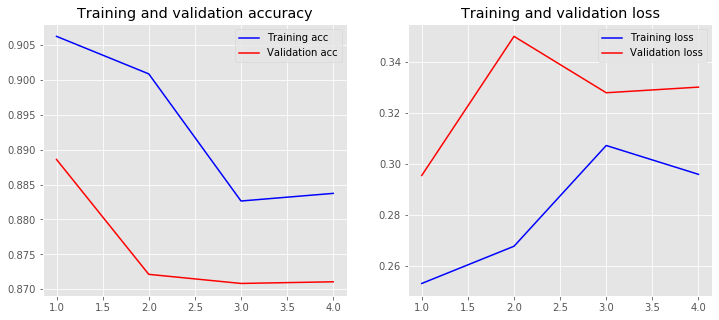

In [ ]:
%%time
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
model.save_weights("/content/preloadmodel.h5")
print("Saved model to disk")

Saved model to disk


 Weight Initialization
The Keras LSTM layer uses the glorot uniform weight initialization by default. This weight
initialization works well in general, but I have had great success using normal type weight
initialization with LSTMs. 

1. random uniform
2. random normal
3. glorot uniform
4. glorot normal

bias regularizer: regularization on the bias weights.
kernel regularizer: regularization on the input weights.
recurrent regularizer: regularization on the recurrent weights.
Rather than a percentage as in the case of Dropout, you can use a regularization class such
as L1, L2, or L1L2 regularization. I would recommend using L1L2 and use values between 0 and
1 that allow to also simulate the L1 and L2 approaches. For example, you could try:

1. L1L2(0.0, 0.0), e.g. baseline or no regularization.
2. L1L2(0.01, 0.0), e.g. L1.
3. L1L2(0.0, 0.01), e.g. L2.
4. L1L2(0.01, 0.01), e.g. L1L2 also called elastic net.
model.add(LSTM(..., kernel_regularizer=L1L2(0.01, 0.01)))

# TYPES - 1, 2 & 3

In [ ]:

import time
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, Conv2D, MaxPool2D
from keras.layers import Bidirectional, GlobalMaxPool1D, Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D,GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras.callbacks import *
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import concatenate



import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

class F1Evaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            y_pred = (y_pred > threshold).astype(int)
            score = f1_score(self.y_val, y_pred)
            print("\n F1 Score - epoch: %d - score: %.6f \n" % (epoch+1, score))


In [ ]:
%%time

def model_cnn():
    filter_sizes = [1,2,3,5]
    num_filters = 36

    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size)(inp)
    x = Reshape((maxlen, embed_size, 1))(x)
    print("MAXLEN is {} and EMBED SIZE {}".format(maxlen,embed_size))

    maxpool_pool = []
    for i in range(len(filter_sizes)):
        conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], embed_size),
                                     kernel_initializer='he_normal', activation='relu')(x)
        maxpool_pool.append(MaxPool2D(pool_size=(maxlen - filter_sizes[i] + 1, 1))(conv))

    z = Concatenate(axis=1)(maxpool_pool)   
    z = Flatten()(z)
    z = Dropout(0.1)(z) # 0.1 -> 0.5

    outp = Dense(1, activation="sigmoid")(z)

    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

model = model_cnn()
print(model.summary())

################################################################################

F1_Score = F1Evaluation(validation_data=(X_test, y_test), interval=1)
mc = ModelCheckpoint('/content/SA-model-type-1.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_acc', patience=3)

history = model.fit(X_train, y_train, batch_size=256, epochs=10,validation_data=(X_test, y_test),callbacks=[F1_Score,mc,es], verbose=1)

################################################################################

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

MAXLEN is 300 and EMBED SIZE 300
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 300, 300)     15000000    input_4[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 300, 300, 1)  0           embedding_4[0][0]                
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 300, 1, 36)   10836       reshape_3[0][0]                  
___________________________________________________________

NameError: ignored

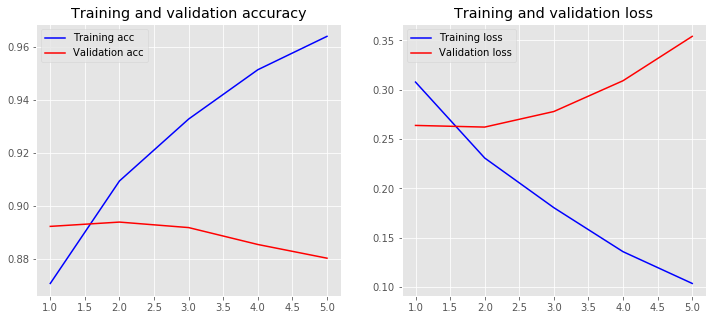

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 300, 300)     15000000    input_11[0][0]                   
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 300, 192)     305664      embedding_11[0][0]               
__________________________________________________________________________________________________
global_average_pooling1d_6 (Glo (None, 192)          0           bidirectional_8[0][0]            
____________________________________________________________________________________________

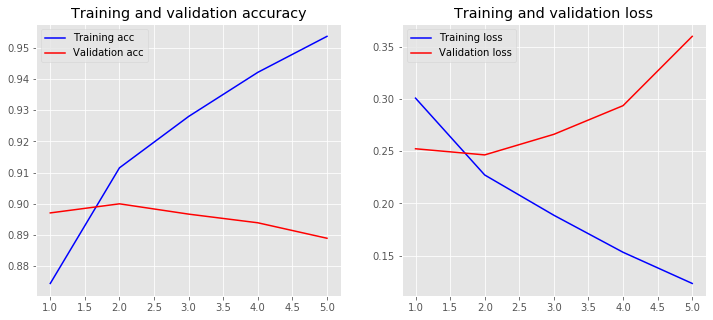

CPU times: user 25min 4s, sys: 10min 45s, total: 35min 50s
Wall time: 39min 15s


In [ ]:
%%time

# BiDirectional LSTM

def model_lstm_du():
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(CuDNNLSTM(96, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(64, activation="relu")(conc)
    conc = Dropout(0.4)(conc)
    outp = Dense(1, activation="sigmoid")(conc)
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


model2 = model_lstm_du()
print(model2.summary())

################################################################################

F1_Score = F1Evaluation(validation_data=(X_test, y_test), interval=1)
mc = ModelCheckpoint('/content/SA-model-type-2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_acc', patience=3)

history = model2.fit(X_train, y_train, batch_size=256, epochs=10,validation_data=(X_test, y_test),callbacks=[F1_Score,mc,es], verbose=1)

################################################################################

loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 300, 300)          15000000  
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 300, 256)          440320    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 300, 128)          164864    
_________________________________________________________________
attention_with_context_1 (At (None, 128)               16640     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65  

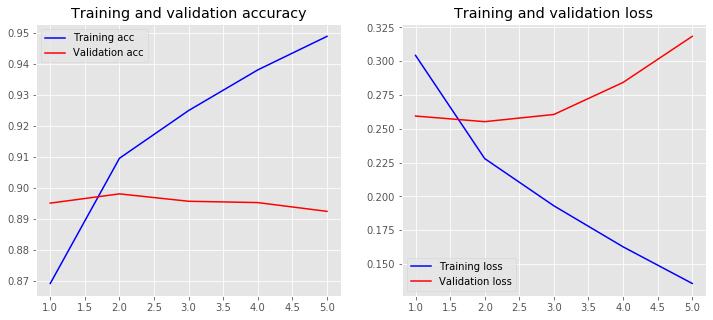

CPU times: user 52min 11s, sys: 22min 41s, total: 1h 14min 53s
Wall time: 1h 21min 13s


In [ ]:
%%time
from keras.engine.topology import Layer

def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)
    

class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]


def model_lstm_atten():
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(x)
    x = AttentionWithContext()(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


model3 = model_lstm_atten()
print(model3.summary())

################################################################################

F1_Score = F1Evaluation(validation_data=(X_test, y_test), interval=1)
mc = ModelCheckpoint('/content/SA-model-type-3.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_acc', patience=3)

history = model3.fit(X_train, y_train, batch_size=256, epochs=10,validation_data=(X_test, y_test),callbacks=[F1_Score,mc,es], verbose=1)

################################################################################

loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
%%time

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pred1 = model.predict(X_train)
pred2 = model2.predict(X_train)
pred3 = model3.predict(X_train)

pred = 0.33*pred1 + 0.33*pred2 + 0.34*pred3
pred = (pred > 0.35).astype(int)

cm = confusion_matrix(y_train,pred)
print(cm)
print()
print(classification_report(y_train,pred))
print()
print("Training_accuracy_score :",accuracy_score(y_train, pred))
print()

print("##########################################################################")
print()

##########################################################################

pred1 = model.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

pred = 0.33*pred1 + 0.33*pred2 + 0.34*pred3
pred = (pred > 0.35).astype(int)

cm = confusion_matrix(y_test,pred)
print(cm)
print()
print(classification_report(y_test,pred))
print()
print("Testing_accuracy_score :",accuracy_score(y_test, pred))
print()

[[151755   7928]
 [  1347 157565]]

Training_classification_report               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    159683
         1.0       0.95      0.99      0.97    158912

    accuracy                           0.97    318595
   macro avg       0.97      0.97      0.97    318595
weighted avg       0.97      0.97      0.97    318595


Training_accuracy_score : 0.9708878042656036

##########################################################################

[[33768  6184]
 [ 2569 37128]]

Testing_classification_report               precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     39952
         1.0       0.86      0.94      0.89     39697

    accuracy                           0.89     79649
   macro avg       0.89      0.89      0.89     79649
weighted avg       0.89      0.89      0.89     79649


Testing_accuracy_score : 0.8901053371668194

CPU times: user 18min 31s, sys: 7min 49s, total:

In [ ]:
!cp '/content/SA-model-type-1.h5' '/content/drive/My Drive/Colab Notebooks/SA-model-type-1.h5'
!cp '/content/SA-model-type-2.h5' '/content/drive/My Drive/Colab Notebooks/SA-model-type-2.h5'
!cp '/content/SA-model-type-3.h5' '/content/drive/My Drive/Colab Notebooks/SA-model-type-3.h5'